# Technical Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Bollinger Bands

- Technical analysis tool used to measure price volatility and identify potential overbought or oversold conditions in a financial instrument.
- Consist of three components:
  - *Middle Band*: A simple moving average (SMA) of the price, typically over 20 periods.
  - *Upper Band*: The middle band plus a multiple (usually 2) of the standard deviation.
  - *Lower Band*: The middle band minus the same multiple of the standard deviation.
- **Formula**:
  - $\text{Middle Band} = \text{SMA}(P,n)$
  - $\text{Upper Band} = \text{Middle Band} + k \cdot \sigma$
  - $\text{Low} = \text{Middle Band} - k \cdot \sigma$
- **Where**:
  - $P$: Price of the asset (usually closing price).
  - $n$: Number of periods (default is 20).
  - $\sigma$: Standard deviation of the asset's price over n periods.
  - $k$: Number of standard deviations (default is 2).
- **Interpretation**:
  - When prices move close to the upper band, the asset may be overbought.
  - When prices move close to the lower band, the asset may be oversold.
  - Prices typically oscillate between the upper and lower bands, indicating areas of support and resistance.
- **Applications**:
  - T*rend Identification*: Expanding bands indicate increased volatility, while contracting bands signal reduced volatility or consolidation.
  - *Reversal Signals*: Extreme price movements outside the bands may suggest a reversal or continuation of a trend.
  - *Mean Reversion*: Traders use Bollinger Bands to anticipate price movements back toward the middle band (mean).
- **Limitations**:
  - Bollinger Bands are reactive and lagging indicators because they are based on historical aapl_df.
  - They do not provide directional signals and should be used in combination with other indicators.
  - In strong trends, prices can stay near the upper or lower band for extended periods, leading to false overbought or oversold signals.
- **Customizations**:
  - The look-back period ($n$) and the standard deviation multiplier ($k$) can be adjusted based on the asset or trading strategy. Common adjustments include shorter periods for intra-day trading or wider bands for volatile assets.

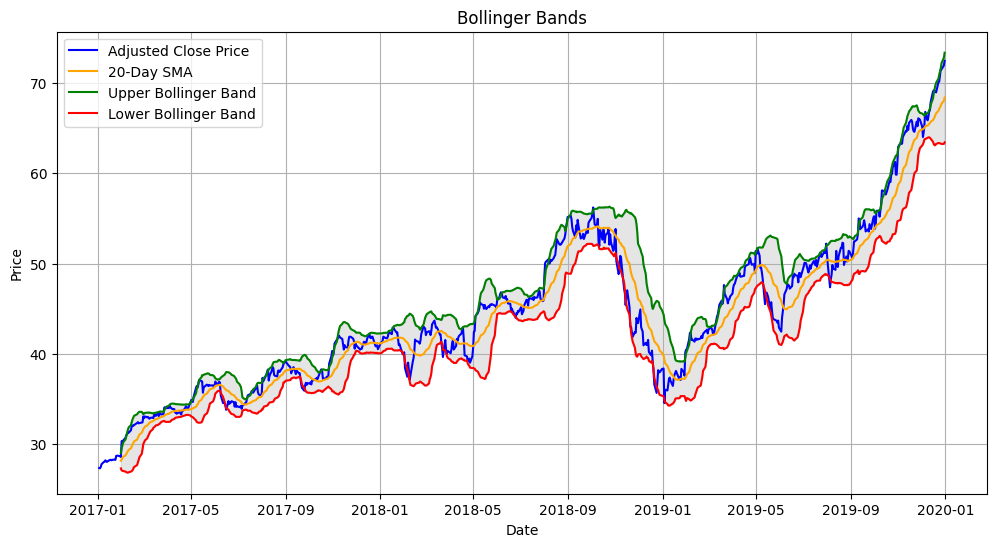

In [5]:
window = 20  # Period for simple moving average (SMA) and standard deviation

aapl_df = pd.read_csv('../mock_data/AAPL.csv', index_col='Date', parse_dates=True)['2017-01-01':'2020-01-01']

# Step 3: Calculate SMA and standard deviation
aapl_df['SMA'] = aapl_df['Adj Close'].rolling(window=window).mean()
aapl_df['StdDev'] = aapl_df['Adj Close'].rolling(window=window).std()

# Step 4: Calculate Bollinger Bands
aapl_df['Upper Band'] = aapl_df['SMA'] + (2 * aapl_df['StdDev'])
aapl_df['Lower Band'] = aapl_df['SMA'] - (2 * aapl_df['StdDev'])

# Step 5: Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(aapl_df.index, aapl_df['SMA'], label=f'{window}-Day SMA', color='orange')
plt.plot(aapl_df.index, aapl_df['Upper Band'], label='Upper Bollinger Band', color='green')
plt.plot(aapl_df.index, aapl_df['Lower Band'], label='Lower Bollinger Band', color='red')
plt.fill_between(aapl_df.index, aapl_df['Lower Band'], aapl_df['Upper Band'], color='gray', alpha=0.2)

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()